In [1]:
!nvidia-smi

Tue Jun 22 14:00:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Train_Datagen = ImageDataGenerator(rescale=1/255, shear_range= 0.2, zoom_range= 0.2, horizontal_flip= True)
Training_set = Train_Datagen.flow_from_directory('/content/drive/MyDrive/Cat vs Dog/train', target_size=(64,64), batch_size= 64, class_mode= 'categorical')

Found 8010 images belonging to 2 classes.


In [5]:
Test_Datagen = ImageDataGenerator(rescale=1/255)
Test_set = Test_Datagen.flow_from_directory('/content/drive/MyDrive/Cat vs Dog/test', target_size=(64,64), batch_size= 64, class_mode= 'categorical')

Found 1000 images belonging to 2 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Dense

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

In [9]:
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

In [10]:
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.4))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [13]:
model.add(Dense(units=2, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0

In [15]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

In [16]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
history = model.fit(Training_set, validation_data= Test_set, steps_per_epoch=len(Training_set), validation_steps=len(Test_set), epochs=30)

Epoch 1/30
126/126 [==============================] - 2853s 22s/step - loss: 1.1168 - accuracy: 0.5730 - val_loss: 2.3012 - val_accuracy: 0.5000
Epoch 2/30
126/126 [==============================] - 39s 308ms/step - loss: 0.7096 - accuracy: 0.6306 - val_loss: 1.1933 - val_accuracy: 0.5000
Epoch 3/30
126/126 [==============================] - 39s 310ms/step - loss: 0.6072 - accuracy: 0.6856 - val_loss: 1.0816 - val_accuracy: 0.5060
Epoch 4/30
126/126 [==============================] - 39s 306ms/step - loss: 0.5562 - accuracy: 0.7248 - val_loss: 0.5601 - val_accuracy: 0.7270
Epoch 5/30
126/126 [==============================] - 39s 306ms/step - loss: 0.5339 - accuracy: 0.7313 - val_loss: 0.4939 - val_accuracy: 0.7430
Epoch 6/30
126/126 [==============================] - 39s 308ms/step - loss: 0.5162 - accuracy: 0.7478 - val_loss: 0.7202 - val_accuracy: 0.6830
Epoch 7/30
126/126 [==============================] - 39s 309ms/step - loss: 0.5155 - accuracy: 0.7451 - val_loss: 0.4472 - val_ac

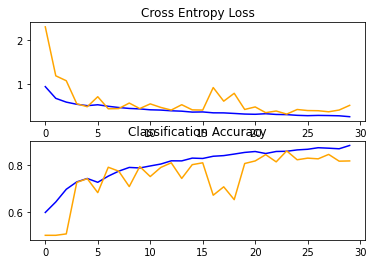

In [17]:
summarize_diagnostics(history)

In [18]:
import cv2
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt

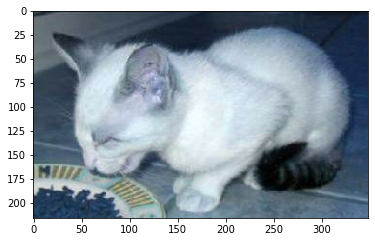

In [19]:
img=cv2.imread('/content/drive/MyDrive/Cat vs Dog/test/cat/cat.9504.jpg')
plt.imshow(img)
plt.show()

In [20]:
image_1=Image.open('/content/drive/MyDrive/Cat vs Dog/test/cat/cat.9504.jpg')
print(image_1.size)
new_image=image_1.resize((64, 64))
print(new_image.size)

(349, 216)
(64, 64)


In [21]:
Pred_image=image.img_to_array(new_image)
Pred_image=np.expand_dims(Pred_image, axis=0)
result=model.predict(Pred_image)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
print(pred)

0
